XOR 게이트 구현해보기

0,0 -> 0

1,0 -> 1

0,1 -> 1

1 -> 0

데이터 준비하기

In [1]:
import numpy as np

import tensorflow as tf
tf.random.set_seed(777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse 

In [2]:
# 데이터 준비하기
data = np.array([[0,0],[1,0],[0,1],[1,1]]) # XOR 연산 학습 데이터
label = np.array([[0],[1],[1],[0]]) # 정답 XOR

모델 구성하기

In [3]:
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu')) # 32개의 신경망 = 다층 퍼셉트론 # 중간에 있는애들은 활성함수 relu를 써야 한다.
model.add(Dense(1,activation='sigmoid'))

모델 설정하기

In [4]:
model.compile(optimizer= SGD(), loss=mse, metrics=['acc']) #mse= mean square error

# SGD는 오래걸린다. 그리고 잘못 갈 가능성이 높다.
#optimizer를 베테랑 산악인으로 바꿔주면 훨씬 빨라진다.

모델 확인하기

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


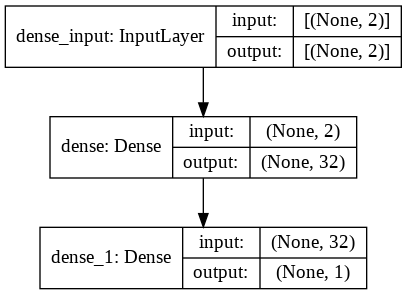

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


모델 학습시키기

In [7]:
history = model.fit(data, label, epochs=1100) # 학습데이터, 정답, 공부 횟수

Epoch 1/1100
1/1 [==============================] - 0s 342ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/1100
1/1 [==============================] - 0s 7ms/step - loss: 0.2644 - acc: 0.2500
Epoch 3/1100
1/1 [==============================] - 0s 5ms/step - loss: 0.2643 - acc: 0.2500
Epoch 4/1100
1/1 [==============================] - 0s 5ms/step - loss: 0.2642 - acc: 0.2500
Epoch 5/1100
1/1 [==============================] - 0s 6ms/step - loss: 0.2640 - acc: 0.2500
Epoch 6/1100
1/1 [==============================] - 0s 4ms/step - loss: 0.2639 - acc: 0.2500
Epoch 7/1100
1/1 [==============================] - 0s 6ms/step - loss: 0.2638 - acc: 0.2500
Epoch 8/1100
1/1 [==============================] - 0s 5ms/step - loss: 0.2637 - acc: 0.2500
Epoch 9/1100
1/1 [==============================] - 0s 4ms/step - loss: 0.2635 - acc: 0.2500
Epoch 10/1100
1/1 [==============================] - 0s 10ms/step - loss: 0.2634 - acc: 0.2500
Epoch 11/1100
1/1 [==============================] - 0s 6ms/step -

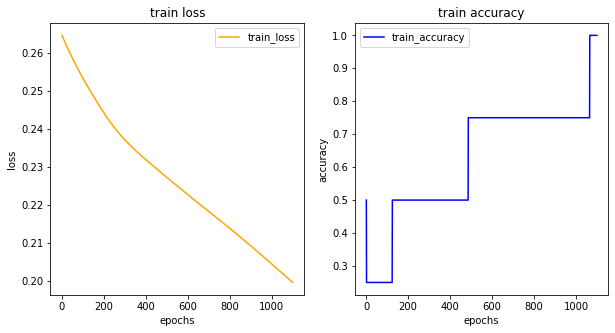

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

#train loss 손실값이 아래 바닥을 찍고 평형에 도달해야 끝나는거다. 만약 평형이 되지 않았다면, 더 돌려야 된다는 뜻이다.

모델 가중치 확인

In [9]:
model.get_weights()

[array([[ 0.14991395, -0.27036768,  0.4346536 ,  0.19380383, -0.21431386,
          0.34058374,  0.3875169 , -0.12286812, -0.13779789, -0.23925437,
          0.11924269,  0.05767742,  0.21620914,  0.09664142,  0.16683929,
          0.3137052 , -0.03311983, -0.37055987, -0.3493019 ,  0.33641258,
         -0.37638694, -0.21128744, -0.12625915,  0.1637368 , -0.22633338,
         -0.4093977 ,  0.37970483, -0.17278033, -0.15622199,  0.24580033,
         -0.33862218, -0.00082418],
        [-0.32846928,  0.2641695 ,  0.23220855, -0.04148837,  0.14612031,
          0.17997435, -0.21508427,  0.2833351 ,  0.06601858,  0.12167646,
         -0.00252971,  0.1203424 ,  0.07702754,  0.38353238,  0.35976866,
          0.29066345, -0.01398495, -0.06497911,  0.04895343,  0.40094665,
          0.4016322 ,  0.29730675, -0.2543157 ,  0.3226654 ,  0.37286657,
         -0.17654489, -0.3797781 , -0.3430747 ,  0.13857497,  0.26342574,
          0.05159537, -0.4087645 ]], dtype=float32),
 array([-1.2284985e-02,

모델 예측하기

In [10]:
result = model.predict(data)
print(result)

[[0.4993763 ]
 [0.5368454 ]
 [0.598348  ]
 [0.41563988]]


In [11]:
result = model.predict_classes(data)
print(result)

[[0]
 [1]
 [1]
 [0]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
